In [25]:
# Importing library

import requests

# Creating a Class for Fetching Cryptocurrency Prices

class CryptoPortfolioTracker:
    # Tracks cryptocurrency portfolio and calculates values.

    def __init__(self):
        # Base URL for the CoinGecko API
        self.base_url = "https://api.coingecko.com/api/v3/simple/price"

    def fetch_crypto_prices(self, cryptos, vs_currency="usd"):
        """ Fetches real-time prices for a list of cryptocurrencies.
        Args:
            cryptos (list): List of cryptocurrency names (e.g., ['bitcoin', 'ethereum']).
            vs_currency (str): The currency in which prices are fetched (default is USD).
        Returns:
            dict: A dictionary containing prices for each cryptocurrency."""
        ids = ",".join(cryptos)  # Convert list of cryptos to a comma-separated string
        params = {
            "ids": ids,  # Pass the cryptocurrency IDs
            "vs_currencies": vs_currency,  # Specify the currency (e.g., USD)
        }
        response = requests.get(self.base_url, params=params)
        if response.status_code == 200:
            return response.json()  # Return the price data as a dictionary
        else:
            # Raise an exception if the API call fails
            raise Exception("Failed to fetch cryptocurrency prices.")

    
    # Calculate the total portfolio value and and providing a breakdown by cryptocurrency

    def calculate_portfolio_value(self, holdings, prices):
        """
        Calculates the total portfolio value based on holdings and prices.
        Args:
            holdings (dict): Dictionary of holdings with crypto names as keys and amounts as values.
            prices (dict): Dictionary of real-time prices fetched from the API.
        Returns:
            tuple: Total portfolio value and a breakdown by cryptocurrency.
        """
        portfolio_value = 0  # Initialize total portfolio value
        portfolio_breakdown = {}  # Dictionary to store value per cryptocurrency
        for crypto, amount in holdings.items():
            if crypto in prices:
                value = amount * prices[crypto]["usd"]  # Calculate value for each cryptocurrency
                portfolio_value += value  # Add to total portfolio value
                portfolio_breakdown[crypto] = value  # Store the value in breakdown
        return portfolio_value, portfolio_breakdown



In [26]:
# Creating the Visualization Class to generate pie and bar charts

# import library
import matplotlib.pyplot as plt

# Pie Chart:

class Visualizer:
    """Generates visualizations for portfolio analysis."""

    @staticmethod
    def plot_pie_chart(portfolio_breakdown):
        """
        Generates a pie chart for portfolio breakdown.
        Args:
            portfolio_breakdown (dict): Breakdown of portfolio values by cryptocurrency.
        """
        labels = list(portfolio_breakdown.keys())  # Get crypto names
        sizes = list(portfolio_breakdown.values())  # Get corresponding values
        plt.figure(figsize=(8, 8))  # Set figure size
        plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140)  # Create pie chart
        plt.title("Cryptocurrency Portfolio Breakdown")  # Set chart title
        plt.show()  # Display the chart

        
    # Bar Chart:
    
    @staticmethod
    def plot_bar_chart(portfolio_breakdown):
        """
        Generates a bar chart for portfolio values.
        Args:
            portfolio_breakdown (dict): Breakdown of portfolio values by cryptocurrency.
        """
        labels = list(portfolio_breakdown.keys())  # Get crypto names
        sizes = list(portfolio_breakdown.values())  # Get corresponding values
        plt.figure(figsize=(10, 6))  # Set figure size
        plt.bar(labels, sizes, color="skyblue")  # Create bar chart
        plt.xlabel("Cryptocurrencies")  # X-axis label
        plt.ylabel("Portfolio Value (USD)")  # Y-axis label
        plt.title("Cryptocurrency Portfolio Values")  # Chart title
        plt.show()  # Display the chart
        

Total Portfolio Value: $95,122.40
Bitcoin: $53,107.00
Ethereum: $38,858.00
Dogecoin: $3,157.40


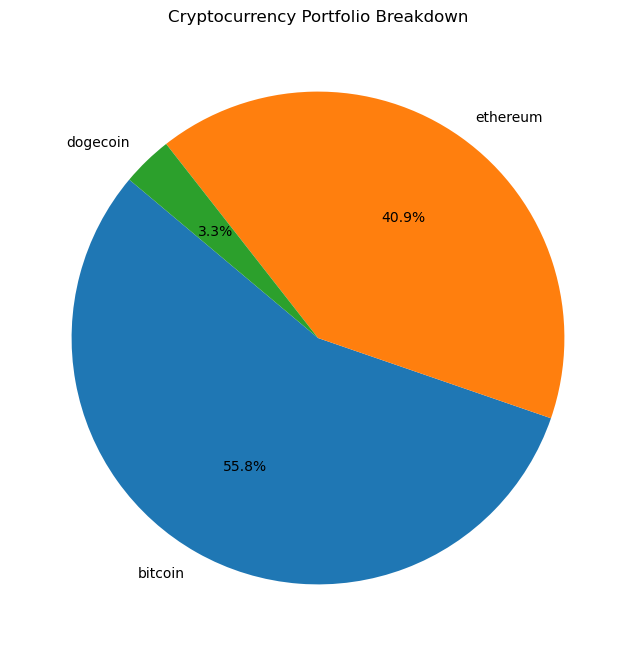

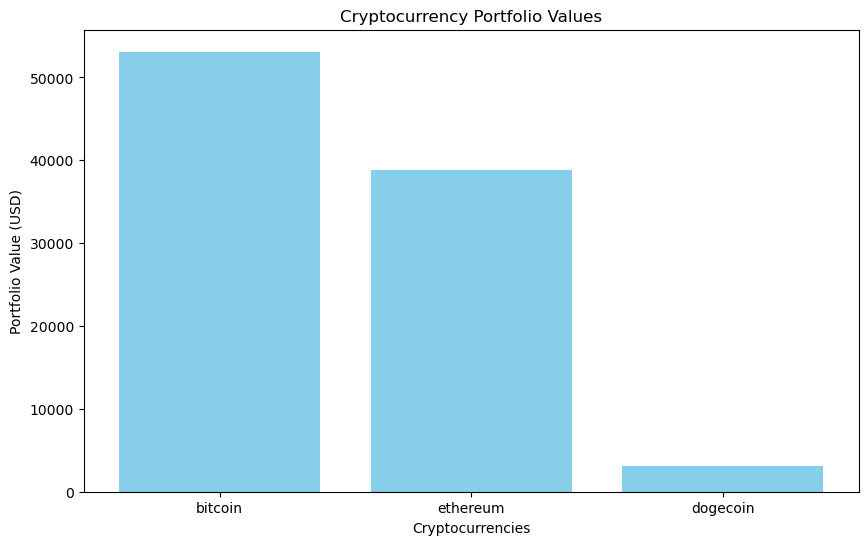

In [27]:
# Main Program Execution (allow the user to input their portfolio and visualize the results)

if __name__ == "__main__":
    try:
        # Example cryptocurrency holdings defined by the user
        holdings = {
            "bitcoin": 0.5,  # 0.5 BTC
            "ethereum": 10,   # 10 ETH
            "dogecoin": 8000  # 8000 DOGE
        }

        # Instantiate the tracker and fetch prices
        tracker = CryptoPortfolioTracker()
        cryptos = list(holdings.keys())  # Extract the list of cryptocurrencies from holdings
        prices = tracker.fetch_crypto_prices(cryptos)  # Fetch real-time prices from API

        # Calculate the total portfolio value and breakdown
        total_value, breakdown = tracker.calculate_portfolio_value(holdings, prices)
        print(f"Total Portfolio Value: ${total_value:,.2f}")  # Display total portfolio value
        for crypto, value in breakdown.items():
            print(f"{crypto.capitalize()}: ${value:,.2f}")  # Display value for each cryptocurrency

        # Visualize the portfolio with multiple charts
        visualizer = Visualizer()
        visualizer.plot_pie_chart(breakdown)  # Generate a pie chart
        visualizer.plot_bar_chart(breakdown)  # Generate a bar chart

    except Exception as e:
        # Handle any errors that occur
        print(f"An error occurred: {e}")
